In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [3]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

---
### Structured

In [4]:
dataset_init = '/home/jardic/Documents/projects/jk/datasets/datasets_prepped/strc_init.csv'
dataset_select = '/home/jardic/Documents/projects/jk/datasets/datasets_prepped/strc_km.csv'

In [5]:
# Read the top rows of the original dataset (to match size of the distance matrix)
df_init = pd.read_csv(dataset_init, index_col=0)
df_select = pd.read_csv(dataset_select, index_col=0)

In [6]:
aurora2 = 'GGAAGGGATGACTATGTCCGGTTCCTGTAAGGCATGTGGAGTGTTGT'

# Get Aurora counts and ppms in the initial library
if aurora2 in df_init['seq'].tolist():
    au2_init_row = df_init[df_init['seq'] == aurora2].iloc[0]
    au2_init_cpm = au2_init_row['cpm']
else:
    au2_init_cpm = 0

# Get Aurora counts and ppms in the initial library
if aurora2 in df_select['seq'].tolist():
    au2_select_row = df_select[df_select['seq'] == aurora2].iloc[0]
    au2_select_cpm = au2_select_row['cpm']
else:
    au2_select_cpm = 0


In [8]:
#scheme = {'c_select':'#293250ff', 'c_init':'#ffd55aff'} # TS colorscheme
scheme = {'c_select':'#48494aff', 'c_init':'#e22760ff'} # tab blue, tab_red
#scheme = {'c_select':'tab:green', 'c_init':'tab:blue'} # tab blue, tab_red

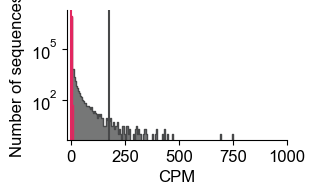

In [9]:
# Define absolute axis size in inches
axis_width = 2.2  # Width in inches
axis_height = 1.3  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

# Plot
sns.histplot(df_select['cpm'], binwidth=5, color=scheme['c_select'], edgecolor=scheme['c_select'], element="step")
sns.histplot(df_init['cpm'], binwidth=5, color=scheme['c_init'], edgecolor=scheme['c_init'], element="step")

# Plot Aurora2 counts in initial and selected
plt.axvline(au2_init_cpm, color=scheme['c_init'])
plt.axvline(au2_select_cpm, color=scheme['c_select'])

plt.yscale('log')

plt.xlim(-20, 1000)
plt.xticks([0, 250, 500, 750, 1000])


plt.xlabel('CPM')
plt.ylabel('Number of sequences')

sns.despine()
plt.savefig('distribution_of_cpms_strc.svg')

In [10]:
print('Number of unique seuences with cpm higher than aurora2:')
len(df_select[df_select['cpm'] > au2_select_cpm])

Number of unique seuences with cpm higher than aurora2:


81

---
### Control

In [11]:
dataset_init = '/home/jardic/Documents/projects/jk/datasets/datasets_prepped/ctrl_init.csv'
dataset_select = '/home/jardic/Documents/projects/jk/datasets/datasets_prepped/ctrl_km.csv'

In [12]:
# Read the top rows of the original dataset (to match size of the distance matrix)
df_init = pd.read_csv(dataset_init, index_col=0)
df_select = pd.read_csv(dataset_select, index_col=0)

In [13]:
aurora2 = 'GGAAGGGATGACTATGTCCGGTTCCTGTAAGGCATGTGGAGTGTTGT'

# Get Aurora counts and ppms in the initial library
if aurora2 in df_init['seq'].tolist():
    au2_init_row = df_init[df_init['seq'] == aurora2].iloc[0]
    au2_init_cpm = au2_init_row['cpm']
else:
    au2_init_cpm = 0

# Get Aurora counts and ppms in the initial library
if aurora2 in df_select['seq'].tolist():
    au2_select_row = df_select[df_select['seq'] == aurora2].iloc[0]
    au2_select_cpm = au2_select_row['cpm']
else:
    au2_select_cpm = 0


In [14]:
#scheme = {'c_select':'#293250ff', 'c_init':'#ffd55aff'} # TS colorscheme
scheme = {'c_select':'#48494aff', 'c_init':'#e22760ff'} # tab blue, tab_red
#scheme = {'c_select':'tab:green', 'c_init':'tab:blue'} # tab blue, tab_red

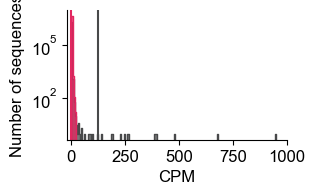

In [15]:
# Define absolute axis size in inches
axis_width = 2.2  # Width in inches
axis_height = 1.3  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

# Plot
sns.histplot(df_select['cpm'], binwidth=5, color=scheme['c_select'], edgecolor=scheme['c_select'], element="step")
sns.histplot(df_init['cpm'], binwidth=5, color=scheme['c_init'], edgecolor=scheme['c_init'], element="step")

# Plot Aurora2 counts in initial and selected
plt.axvline(au2_init_cpm, color=scheme['c_init'])
plt.axvline(au2_select_cpm, color=scheme['c_select'])

plt.yscale('log')

plt.xlim(-20, 1000)
plt.xticks([0, 250, 500, 750, 1000])


plt.xlabel('CPM')
plt.ylabel('Number of sequences')

sns.despine()
plt.savefig('distribution_of_cpms_ctrl.svg')

In [18]:
print('Number of unique seuences with cpm higher than aurora2:')
len(df_select[df_select['cpm'] > au2_select_cpm])

Number of unique seuences with cpm higher than aurora2:


11